In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [132]:
data = pd.read_csv('used_car_price_dataset_extended.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [133]:
data.head(n=20)

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
5,2002,13.77,2500,Diesel,4,6856.03,BMW,Manual,Gray,Full,1,Yes
6,2023,12.50,1000,Petrol,3,6806.77,BMW,Manual,Red,Full,0,Yes
7,2015,17.46,2000,Diesel,5,7701.84,BMW,Manual,Blue,NaN,0,Yes
8,2001,14.99,5000,Diesel,2,8730.52,Tesla,Manual,Silver,Partial,1,No
9,2020,19.59,4000,Petrol,4,10812.16,Chevrolet,Automatic,White,Partial,0,Yes


In [134]:
data.tail()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes
9999,2007,18.81,5000,Petrol,1,11634.09,BMW,Automatic,Silver,Full,0,Yes


In [135]:
data.corr(numeric_only=True)

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
make_year,1.000000,-0.013167,-0.017912,-0.021550,0.432603,-0.005151
mileage_kmpl,-0.013167,1.000000,-0.003222,-0.008310,0.211971,0.004567
engine_cc,-0.017912,-0.003222,1.000000,-0.000358,0.678161,-0.007750
owner_count,-0.021550,-0.008310,-0.000358,1.000000,-0.262266,-0.009365
price_usd,0.432603,0.211971,0.678161,-0.262266,1.000000,-0.001461
accidents_reported,-0.005151,0.004567,-0.007750,-0.009365,-0.001461,1.000000


In [136]:
data['service_history'].fillna('Unknown', inplace=True)
data.head(n=20)

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,Unknown,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,Unknown,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
5,2002,13.77,2500,Diesel,4,6856.03,BMW,Manual,Gray,Full,1,Yes
6,2023,12.50,1000,Petrol,3,6806.77,BMW,Manual,Red,Full,0,Yes
7,2015,17.46,2000,Diesel,5,7701.84,BMW,Manual,Blue,Unknown,0,Yes
8,2001,14.99,5000,Diesel,2,8730.52,Tesla,Manual,Silver,Partial,1,No
9,2020,19.59,4000,Petrol,4,10812.16,Chevrolet,Automatic,White,Partial,0,Yes


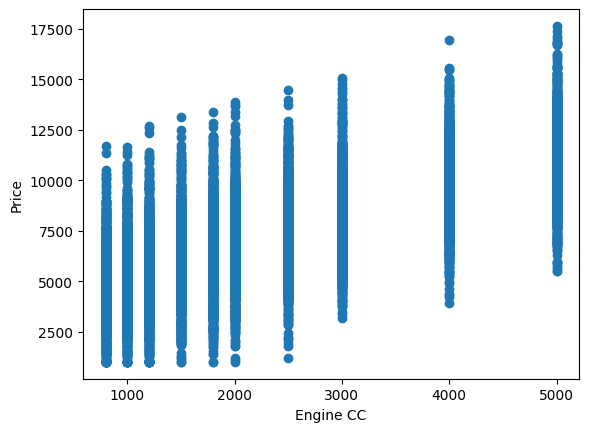

In [137]:
plt.xlabel('Engine CC')
plt.ylabel('Price')
plt.scatter(data['engine_cc'], data['price_usd'])
plt.show()

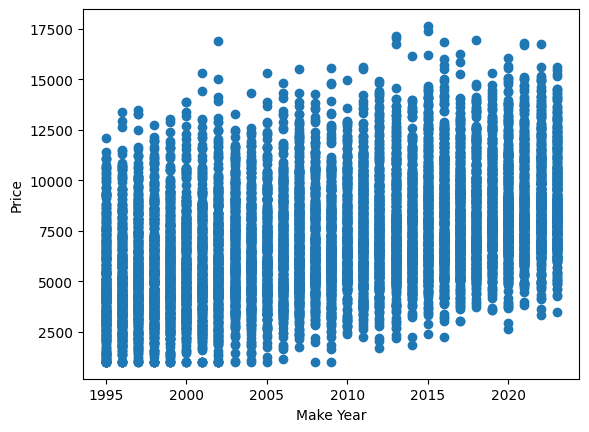

In [138]:
plt.xlabel('Make Year')
plt.ylabel('Price')
plt.scatter(data['make_year'], data['price_usd'])
plt.show()

In [139]:
data

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,Unknown,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,Unknown,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,Unknown,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes


In [140]:
data['insurance_valid'] = data['insurance_valid'].map({'No':0, 'Yes':1})

In [141]:
data

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,Unknown,0,0
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,Unknown,0,1
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,1
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,1
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,Unknown,0,1
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,1
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,1
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,1


In [142]:
data = pd.get_dummies(data, dtype=int)
data

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported,insurance_valid,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,...,transmission_Manual,color_Black,color_Blue,color_Gray,color_Red,color_Silver,color_White,service_history_Full,service_history_Partial,service_history_Unknown
0,2001,8.17,4000,4,8587.64,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
1,2014,17.59,1500,4,5943.50,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,2023,18.09,2500,5,9273.58,1,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2009,11.28,800,1,6836.24,0,1,0,0,1,...,1,0,1,0,0,0,0,1,0,0
4,2005,12.23,1000,2,4625.79,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,2,5498.71,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,1
9996,1997,14.45,5000,1,9588.31,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
9997,2002,19.41,1000,4,4557.10,0,1,1,0,0,...,1,1,0,0,0,0,0,1,0,0
9998,2005,12.95,4000,5,7413.59,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [143]:
X = data.drop(columns=['price_usd'])
y = data['price_usd']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
X_train

,make_year,mileage_kmpl,engine_cc,owner_count,accidents_reported,insurance_valid,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,brand_BMW,...,transmission_Manual,color_Black,color_Blue,color_Gray,color_Red,color_Silver,color_White,service_history_Full,service_history_Partial,service_history_Unknown
7637,2005,24.79,1500,5,1,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
1475,2020,21.48,1200,2,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
6540,2000,19.98,1000,2,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
6164,2002,21.03,4000,4,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1353,2023,18.61,1200,2,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,2012,18.70,800,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8631,2020,14.60,1800,2,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
9818,2001,22.64,4000,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4041,2008,23.45,1200,2,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [145]:
y_test

5256     5405.77
7272    10082.27
1323     7057.25
4924     4704.87
5845     5724.78
          ...   
9260     9896.09
8020    12898.23
6337     9121.42
5638     9338.84
721      8859.46
Name: price_usd, Length: 2000, dtype: float64

In [146]:
type(y_test)

pandas.core.series.Series

In [147]:
y_test = y_test.sort_index()
y_test

0        8587.64
10      10070.16
16       6491.29
22       5209.92
28       4481.10
          ...   
9986     3170.77
9991     9728.62
9993     5617.77
9994    11527.42
9995     5498.71
Name: price_usd, Length: 2000, dtype: float64

In [148]:
X_test = X_test.sort_index()
X_test

,make_year,mileage_kmpl,engine_cc,owner_count,accidents_reported,insurance_valid,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,brand_BMW,...,transmission_Manual,color_Black,color_Blue,color_Gray,color_Red,color_Silver,color_White,service_history_Full,service_history_Partial,service_history_Unknown
0,2001,8.17,4000,4,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
10,2013,21.25,1800,2,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
16,1998,27.29,1800,3,2,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
22,1996,17.38,3000,2,1,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
28,2015,15.50,2000,5,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,1999,13.07,3000,5,0,1,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
9991,2018,9.60,4000,3,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
9993,2004,17.95,2000,2,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
9994,2014,16.57,5000,2,0,1,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [149]:
rfr = RandomForestRegressor(n_estimators=200)

In [150]:
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [151]:
y_pred = rfr.predict(X_test)
y_pred

array([ 6158.77085,  7481.82865,  5438.2111 , ...,  6711.67175,
       12473.9688 ,  4074.13475])

In [152]:
rfr.score(X_test, y_test)

0.8478768142103026

In [153]:
mean_absolute_error(y_test, y_pred)

851.4420767000001

In [154]:
mean_squared_error(y_test, y_pred)

1149163.1931496838

In [155]:
r2_score(y_test, y_pred)

0.8478768142103026

In [156]:
root_mean_squared_error(y_test, y_pred)

1071.9902952684245

In [157]:
data['price_usd'].mean()

7179.754531999999

In [158]:
data['price_usd'].median()

6961.26

In [159]:
y_test

0        8587.64
10      10070.16
16       6491.29
22       5209.92
28       4481.10
          ...   
9986     3170.77
9991     9728.62
9993     5617.77
9994    11527.42
9995     5498.71
Name: price_usd, Length: 2000, dtype: float64

In [160]:
y_pred

array([ 6158.77085,  7481.82865,  5438.2111 , ...,  6711.67175,
       12473.9688 ,  4074.13475])

In [161]:
graph_test = y_test.reset_index(drop=True)
graph_test

0        8587.64
1       10070.16
2        6491.29
3        5209.92
4        4481.10
          ...   
1995     3170.77
1996     9728.62
1997     5617.77
1998    11527.42
1999     5498.71
Name: price_usd, Length: 2000, dtype: float64

In [162]:
y_pred = np.round(y_pred, 2)
y_pred

array([ 6158.77,  7481.83,  5438.21, ...,  6711.67, 12473.97,  4074.13])

In [163]:
graph_pred = pd.Series(y_pred)
graph_pred

0        6158.77
1        7481.83
2        5438.21
3        6739.41
4        6305.21
          ...   
1995     5517.59
1996     9507.98
1997     6711.67
1998    12473.97
1999     4074.13
Length: 2000, dtype: float64

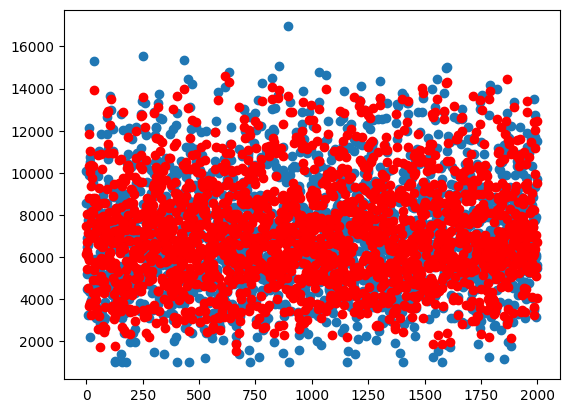

In [164]:
plt.scatter(graph_test.index, graph_test)
plt.scatter(graph_pred.index, graph_pred, c='r')
plt.show()

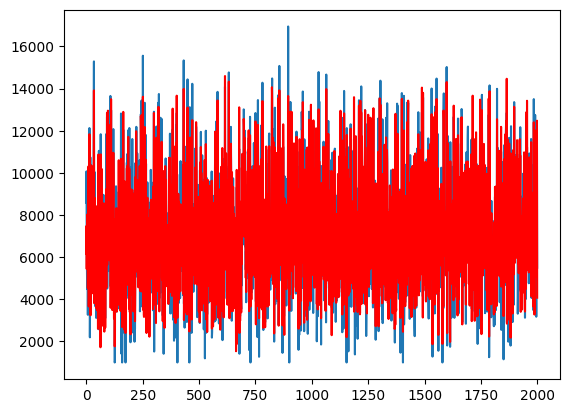

In [165]:
plt.plot(graph_test)
plt.plot(graph_pred, c='r')
plt.show()

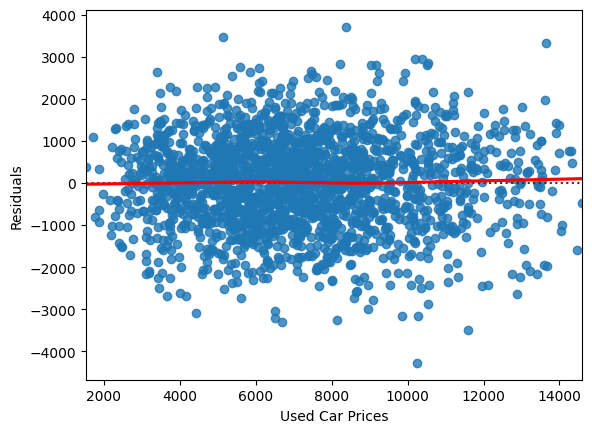

In [166]:
sns.residplot(x=graph_pred, y=graph_test, lowess=True, line_kws=dict(color='r'))
plt.xlabel('Used Car Prices')
plt.ylabel('Residuals')
plt.show()

In [167]:
importances = rfr.feature_importances_
importances

array([0.21484315, 0.08207676, 0.46588758, 0.06377956, 0.00588739,
       0.00340137, 0.00211611, 0.10234719, 0.00209899, 0.00265086,
       0.00243101, 0.00277972, 0.00253237, 0.00259278, 0.00274699,
       0.00280024, 0.00255781, 0.00269313, 0.00255514, 0.0021675 ,
       0.00224985, 0.0029835 , 0.00303635, 0.00282032, 0.00309374,
       0.00308104, 0.00307666, 0.00304829, 0.00298464, 0.00267998])

In [168]:
importancesDF = pd.DataFrame(data=importances, columns=['Importances'])
importancesDF

,Importances
0,0.214843
1,0.082077
2,0.465888
3,0.063780
4,0.005887
5,0.003401
6,0.002116
7,0.102347
8,0.002099
9,0.002651


In [169]:
importancesDF['Features'] = X.columns
importancesDF

,Importances,Features
0,0.214843,make_year
1,0.082077,mileage_kmpl
2,0.465888,engine_cc
3,0.063780,owner_count
4,0.005887,accidents_reported
5,0.003401,insurance_valid
6,0.002116,fuel_type_Diesel
7,0.102347,fuel_type_Electric
8,0.002099,fuel_type_Petrol
9,0.002651,brand_BMW


In [170]:
importancesDF = importancesDF[['Features', 'Importances']]
importancesDF

,Features,Importances
0,make_year,0.214843
1,mileage_kmpl,0.082077
2,engine_cc,0.465888
3,owner_count,0.063780
4,accidents_reported,0.005887
5,insurance_valid,0.003401
6,fuel_type_Diesel,0.002116
7,fuel_type_Electric,0.102347
8,fuel_type_Petrol,0.002099
9,brand_BMW,0.002651


In [171]:
importancesDF.sort_values(by=['Importances'], inplace=True, ascending=False)
importancesDF

,Features,Importances
2,engine_cc,0.465888
0,make_year,0.214843
7,fuel_type_Electric,0.102347
1,mileage_kmpl,0.082077
3,owner_count,0.063780
4,accidents_reported,0.005887
5,insurance_valid,0.003401
24,color_Red,0.003094
25,color_Silver,0.003081
26,color_White,0.003077


In [172]:
importancesDF.reset_index(inplace=True, drop=True)
importancesDF

,Features,Importances
0,engine_cc,0.465888
1,make_year,0.214843
2,fuel_type_Electric,0.102347
3,mileage_kmpl,0.082077
4,owner_count,0.063780
5,accidents_reported,0.005887
6,insurance_valid,0.003401
7,color_Red,0.003094
8,color_Silver,0.003081
9,color_White,0.003077


<Axes: xlabel='Importances', ylabel='Features'>

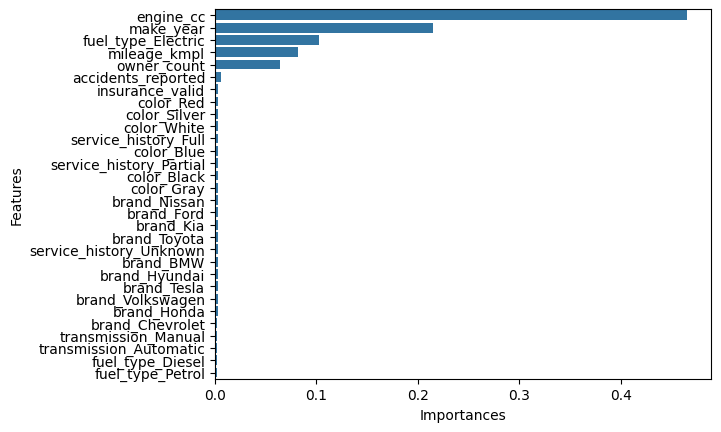

In [173]:
sns.barplot(importancesDF, x="Importances", y="Features")